In [1]:
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
seaborn.mpl.rcParams['figure.figsize'] = (10.0, 6.0)
seaborn.mpl.rcParams['savefig.dpi'] = 90
seaborn.mpl.rcParams['font.family'] = 'sans-serif'
seaborn.mpl.rcParams['font.size'] = 14

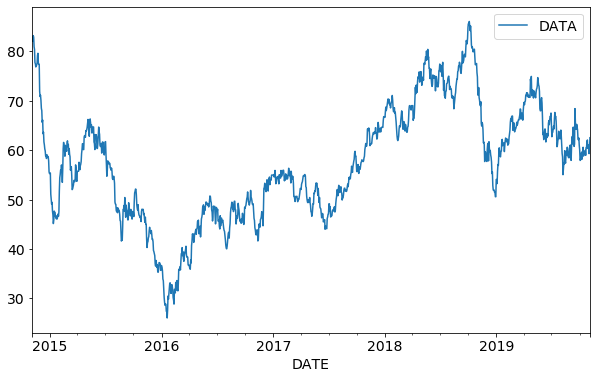

In [3]:
import pandas as pd
import statsmodels.api as sm

#import arch.data.default
default = pd.read_excel("DCOILBRENTEU.xlsx", index_col = "DATE", parse_dates=["DATE"])
#PG.head(3)

#default_data = arch.data.default.load()
#default = default_data.BAA.copy()
#default.name = 'default'
#default = default - default_data.AAA.values
fig = default.plot()

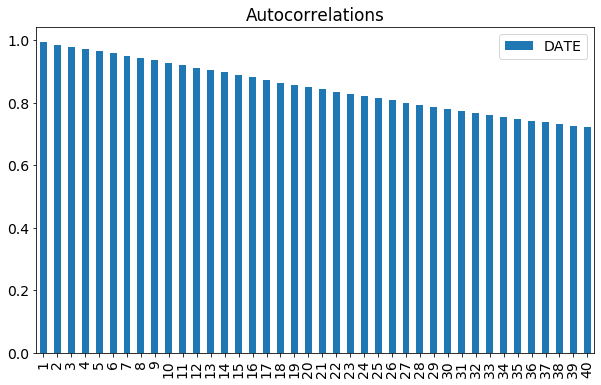

In [4]:
acf = pd.DataFrame(sm.tsa.stattools.acf(default), columns=['DATE'])
fig = acf[1:].plot(kind='bar', title='Autocorrelations')

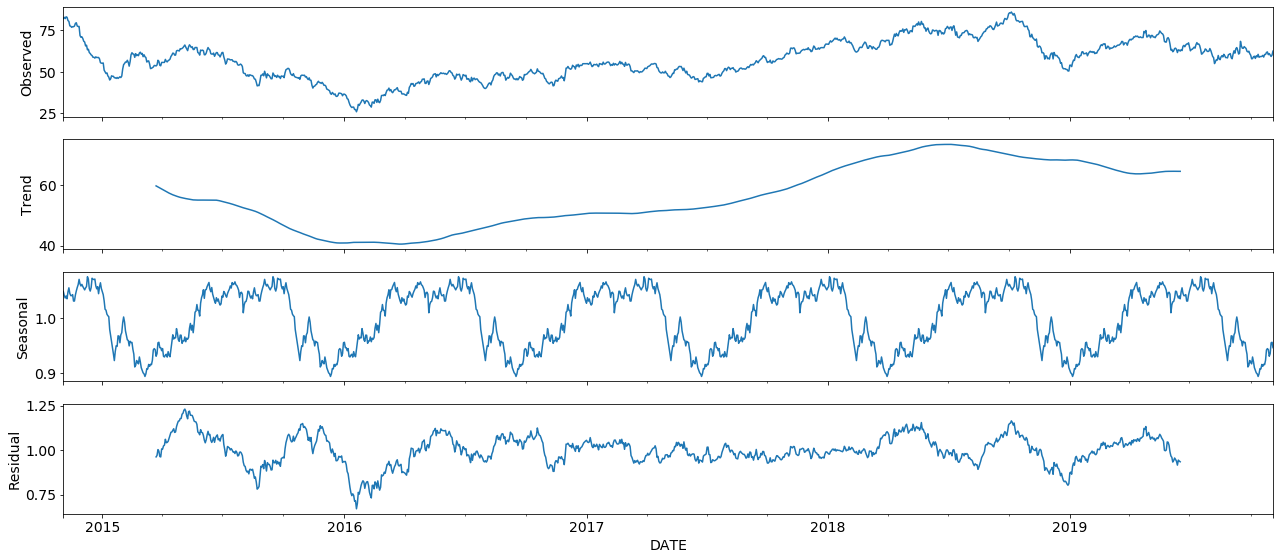

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(default, model='multiplicative',freq=200)
fig = decomposition.plot()
plt.show()

In [6]:
from arch.unitroot import ADF

adf = ADF(default)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.430
P-value                         0.133
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [7]:
adf.lags = 5
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.426
P-value                         0.135
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [8]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    

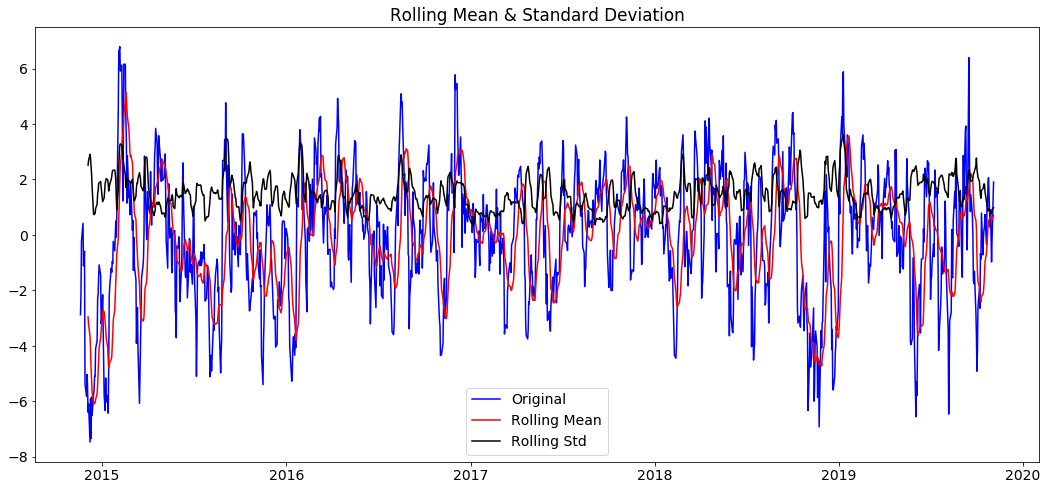

In [9]:
rolling_mean = default.rolling(window=12).mean()
default_minus_mean = default - rolling_mean
default_minus_mean.dropna(inplace=True)
get_stationarity(default_minus_mean)

# conclusion
The results of the ADF test with Lag 0 and Lag 5, the Test statistics is more than critical value (just more than 10% value). This means the Null Hypothesis is accepted, there is unit root, the wave is not stationary, which means the data is not mean reverting.

 The signal decomposition suggest that the trend is down-up-down. With present data, the test shows the wave is not stationary, nevertheless with more time series data it might be mean revrting.

In [10]:
adf.trend = 'ct'
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.591
P-value                         0.031
Lags                                5
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [11]:
reg_res = adf.regression
print(reg_res.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.510
Date:                Wed, 04 Dec 2019   Prob (F-statistic):             0.0145
Time:                        10:09:48   Log-Likelihood:                -2083.4
No. Observations:                1299   AIC:                             4183.
Df Residuals:                    1291   BIC:                             4224.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0122      0.003     -3.591      0.0

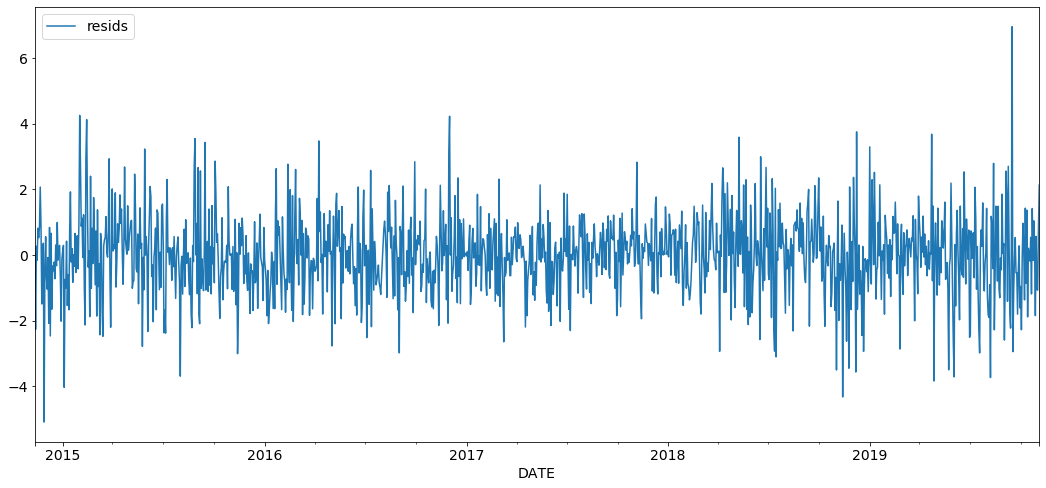

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

resids = pd.DataFrame(reg_res.resid)
resids.index = default.index[6:]
resids.columns = ['resids']
fig = resids.plot()

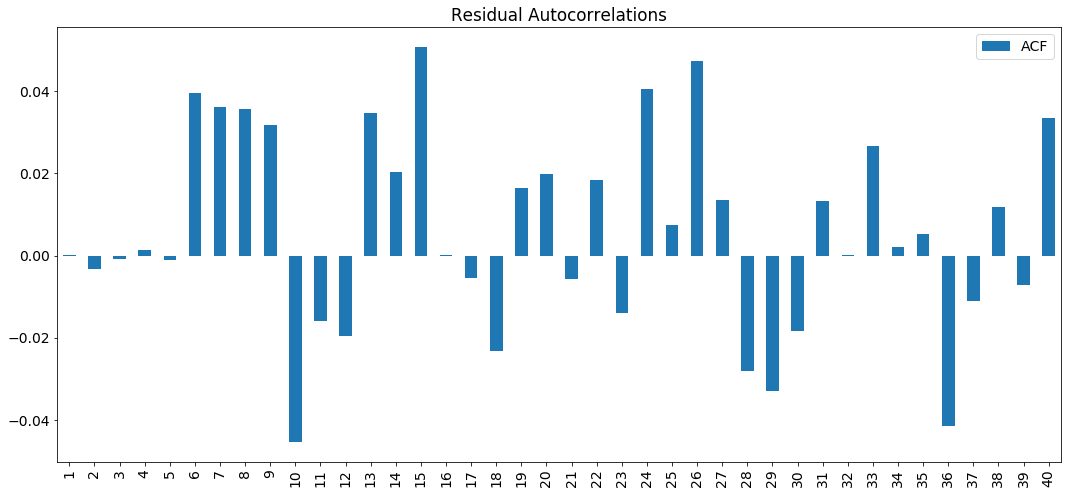

In [13]:
acf = pd.DataFrame(sm.tsa.stattools.acf(reg_res.resid), columns=['ACF'])
fig = acf[1:].plot(kind='bar', title='Residual Autocorrelations')

In [14]:
from arch.unitroot import DFGLS

dfgls = DFGLS(default)
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -0.673
P-value                         0.439
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -2.58 (1%), -1.96 (5%), -1.64 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [15]:
dfgls.trend = 'ct'
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -1.048
P-value                         0.816
Lags                                0
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.42 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [16]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(default)
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.599
P-value                         0.093
Lags                               23
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [17]:
pp.lags = 12
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.522
P-value                         0.110
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [18]:

pp.trend = 'ct'
print(pp.summary().as_text())



     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.610
P-value                         0.029
Lags                               12
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [19]:
pp.test_type = 'rho'
print(pp.summary().as_text())

     Phillips-Perron Test (Z-rho)    
Test Statistic                -16.495
P-value                         0.140
Lags                               12
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.18 (1%), -21.61 (5%), -18.17 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [20]:
from arch.unitroot import KPSS

kpss = KPSS(default)
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  2.495
P-value                         0.000
Lags                               21
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [21]:
kpss.trend = 'ct'
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.585
P-value                         0.000
Lags                               21
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [22]:
from arch.unitroot import ZivotAndrews

za = ZivotAndrews(default)
print(za.summary().as_text())

        Zivot-Andrews Results        
Test Statistic                 -4.311
P-value                         0.187
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.


In [23]:
#import numpy as np
#import pandas as pd
#import arch.data.frenchdata
#ff = arch.data.frenchdata.load()
#excess_market = ff.iloc[:, 0]  # Excess Market
#print(ff.describe())

In [24]:
#from arch.unitroot import VarianceRatio
#vr = VarianceRatio(excess_market, 12)
#print(vr.summary().as_text())

In [25]:
#warnings.simplefilter('always')  # Restore warnings

#vr.overlap = False
#print(vr.summary().as_text())